In [1]:
# https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data
# https://drive.google.com/file/d/1lqiQsKN0QyUXc7S8gV-IKRsNYDnkRjZn/view?usp=sharing

In [2]:
!unzip /content/drive/MyDrive/data/kaggle/competitive-data-science-predict-future-sales.zip

Archive:  /content/drive/MyDrive/data/kaggle/competitive-data-science-predict-future-sales.zip
  inflating: item_categories.csv     
  inflating: items.csv               
  inflating: sales_train.csv         
  inflating: sample_submission.csv   
  inflating: shops.csv               
  inflating: test.csv                


- 과거 판매 데이터를 토대로 향후 판매량 예측
  - 타깃값은 판매량이므로 범주형 데이터가 아님. 따라 회귀 문제에 속함
- 주어진 데이터는 2013년 1월부터 2015년 10월까지의 일별 판매 내역
  - 더불어 상점, 상품, 상품분류에 관한 추가 데이터도 있음
  - 이 데이터를 기반으로 2015년 11월 각 상점의 상품별 월간 판매량을 예측해야 함
  - 피처: 상점 및 상품에 관한 정보, 타깃값: 월간 판매량
- 주의점
  - 상품별 월간 판매량(타깃값)은 0개에서 20개 사이여야 함
  - 타깃값뿐만 아니라 판매량과 관련된 피처는 모두 0~20 사이로 값을 제한해야 함


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = '/content/'
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [5]:
sales_train.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [13]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [16]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [17]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [18]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [19]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [20]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [21]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [22]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [23]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [32]:
# 피처 요약표 만들기
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    return summary

In [33]:
resumetable(train)

Dataset Shape: (2935849, 10)


,피처,dtypes,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


In [34]:
# 데이터 시각화
# 일별 판매량

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='item_cnt_day'>

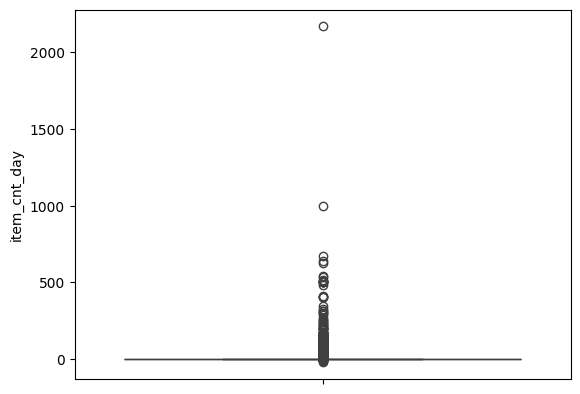

In [38]:
sns.boxplot(data=train, y='item_cnt_day')

<Axes: ylabel='item_price'>

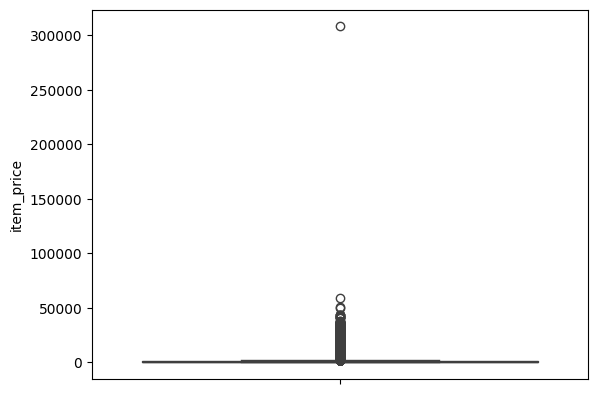

In [40]:
# 상품가격
sns.boxplot(data=train, y='item_price')

In [41]:
goup = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
goup.reset_index(inplace=True)
goup

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


<ipython-input-61-c18f968e90ec>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date_block_num', y='item_cnt_day', data=goup_month_sum,palette=palette,legend=False)


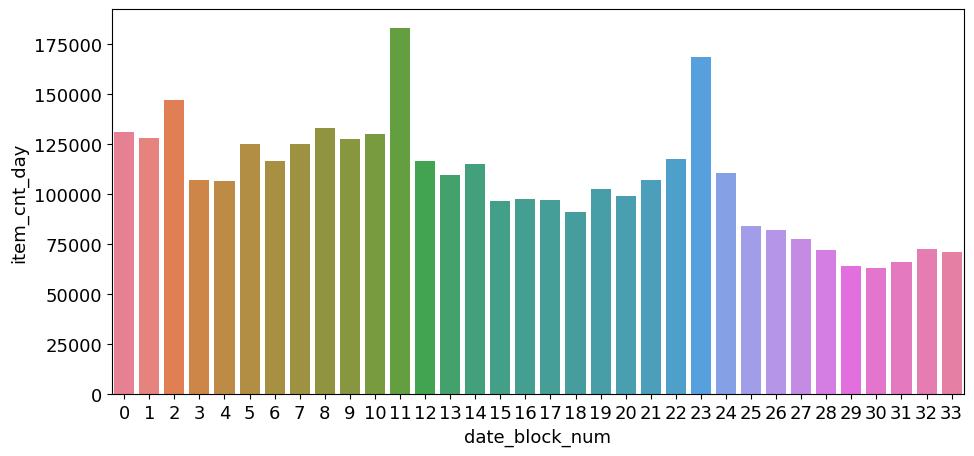

In [61]:
# 월별 판매량
import matplotlib as mpl
mpl.rc('font',size=13)
figure, ax =  plt.subplots()
figure.set_size_inches(11,5)

# 월별 총 상품 판매량
goup_month_sum = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
goup_month_sum.reset_index(inplace=True)

# 월별 총 상품 판매량 막대 그래프
palette = sns.color_palette("husl", len(goup_month_sum))
sns.barplot(x='date_block_num', y='item_cnt_day', data=goup_month_sum,palette=palette,legend=False)
plt.show()

In [54]:
palette

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9692894417585417, 0.4522225702495641, 0.4261820543616833),
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138),
 (0.890505610091069, 0.5199537141863416, 0.19575792074156828),
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758),
 (0.7683271076190015, 0.5816798170195111, 0.1946969920265838),
 (0.7188721694437208, 0.601448945129206, 0.19432336924941168),
 (0.6707067620542166, 0.6183981503261837, 0.19398957509205997),
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465),
 (0.5615229109598268, 0.6497101483863353, 0.19333954966604813),
 (0.48656894593750394, 0.6663726666050075, 0.19297564161091252),
 (0.3719375293111256, 0.6855530307409238, 0.19254095005558877),
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233),
 (0.1989376956463746, 0.6940313497882532, 0.4272539014485175),
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193),
 (0.20552427607615448, 0.6846548406076188, 0.5623139338264245),
 (0.20806612541243952, 0.6808998626985141, 0.6056504754121731),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678),
 (0.21541566505718968, 0.6695930660637992, 0.7153920884875231),
 (0.21840821737392985, 0.6647898200401803, 0.7553445340026518),
 (0.22220544898465205, 0.6585210338454492, 0.8031687623961109),
 (0.2276041189151808, 0.6492591618617503, 0.8667352328785314),
 (0.2528186785662627, 0.6322661966470429, 0.9586861264495917),
 (0.46464649399867336, 0.6001189477477143, 0.9585131479964976),
 (0.590356051443871, 0.5672697683416862, 0.958348217126244),
 (0.690592305012026, 0.5310029892694575, 0.9581797268573365),
 (0.782279853549416, 0.48725654760876974, 0.9579950210252449),
 (0.8753266398274079, 0.4280264074507189, 0.9577762021967094),
 (0.9582498882450498, 0.36198809605341525, 0.9372277276912429),
 (0.9609894338512172, 0.3866875852472021, 0.8475770545475213),
 (0.9630327371699324, 0.40397639679071573, 0.771304184391217),
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112),
 (0.9662183695417378, 0.4293305082631779, 0.6269197122023931)]

In [62]:
# 상품 분류별 판매량
goup_cat_sum =  train.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
goup_cat_sum.reset_index(inplace=True)

In [65]:
goup_cat_sum.head()

,item_category_id,item_cnt_day
0,0,3.0
1,1,2.0
2,2,19597.0
3,3,29807.0
4,4,2407.0


In [67]:
# 총 판매량이 10000개를 초과하는 상품분류만 추출
goup_cat_sum = goup_cat_sum[goup_cat_sum['item_cnt_day'] > 10000]
goup_cat_sum.head()

,item_category_id,item_cnt_day
2,2,19597.0
3,3,29807.0
6,6,20472.0
8,8,13699.0
9,9,18118.0


<ipython-input-69-c04ad91799a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='item_category_id', y='item_cnt_day', data=goup_cat_sum,palette=palette,legend=False)


<Axes: xlabel='item_category_id', ylabel='item_cnt_day'>

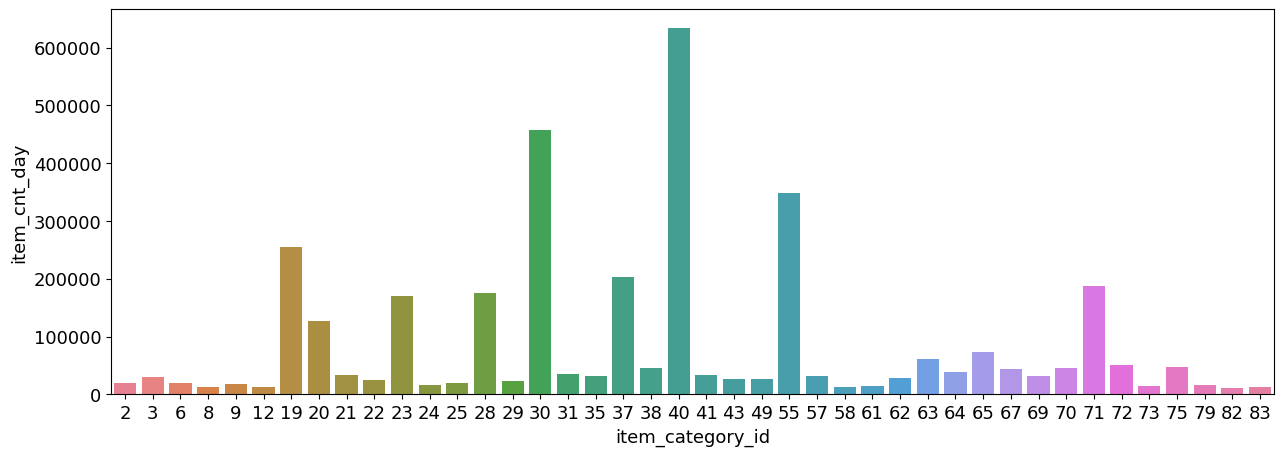

In [69]:
# 상품분류별 총 상품 판매량 막대그래프
plt.figure(figsize=(15,5))
palette = sns.color_palette("husl", len(goup_cat_sum))
sns.barplot(x='item_category_id', y='item_cnt_day', data=goup_cat_sum,palette=palette,legend=False)

In [70]:
# 상점별 판매량
gropu_shop_sum = train.groupby('shop_id').agg({'item_cnt_day': 'sum'})
gropu_shop_sum.reset_index(inplace=True)
gropu_shop_sum.head()

,shop_id,item_cnt_day
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0


In [71]:
# 총 판매량이 10000개를 초과하는 상품분류만 추출
gropu_shop_sum = gropu_shop_sum[gropu_shop_sum['item_cnt_day'] > 10000]
gropu_shop_sum.head()

,shop_id,item_cnt_day
0,0,11705.0
2,2,30620.0
3,3,28355.0
4,4,43942.0
5,5,42762.0


<ipython-input-73-18f643b0f74a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shop_id', y='item_cnt_day', data=gropu_shop_sum,palette=palette,legend=False)


<Axes: xlabel='shop_id', ylabel='item_cnt_day'>

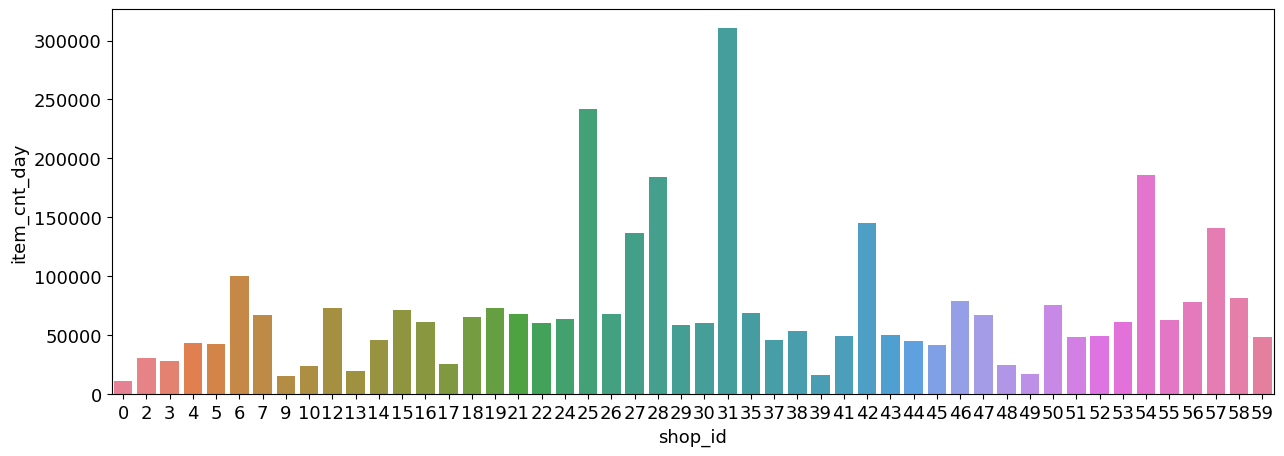

In [73]:
# 상점별 총 상품 판매량 막대그래프
plt.figure(figsize=(15,5))
palette = sns.color_palette("husl", len(gropu_shop_sum))
sns.barplot(x='shop_id', y='item_cnt_day', data=gropu_shop_sum,palette=palette,legend=False)

In [74]:
# 모델 개발

In [75]:
# 피처 한글화
# 가독성차원에서..
sales_train.rename(
    columns=
     {'date': '날짜', 'date_block_num': '월ID',
      'shop_id': '상점ID', 'item_id': '상품ID',
      'item_price': '판매가',   'item_cnt_day': '판매량'}, inplace=True)

In [76]:
sales_train.head()

,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [78]:
shops.rename(columns=
 {
     'shop_name': '상점명','shop_id': '상점ID'
 }, inplace=True)
shops.head()

,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [79]:
items.rename(columns=
 {
     'item_name': '상품명','item_id': '상품ID','item_category_id': '상품분류ID'
 }, inplace=True)
items.head()

,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [81]:
item_categories.columns = ['상품분류명','상품분류ID']
item_categories.head()

,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [82]:
test.columns = ['ID','상점ID','상품ID']
test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


데이터 다운캐스팅
- 메모리 절약
  - 큰 데이터 기본적으로 int64 float64 저장되는데 범위가 더 작은 데이터를 사용하면 int8, int16,float32
- 속도향상
- 불필요한 정밀도 제거
  - 높은 정밀도가 필요하지 않은 데이터는 float32, float16  

In [100]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type_name = df[col].dtypes.name
        if col_type_name == 'object':
            pass
        elif col_type_name == 'bool':
            df[col] = df[col].astype('int8')
        elif col_type_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print(f'{100*(start_mem-end_mem) / start_mem} 압축됨')
    return df


In [101]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

54.1666174664819 압축됨
38.60294117647059 압축됨
54.153639178666985 압축됨
39.94565217391305 압축됨
70.83156970881522 압축됨
